<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-149/blob/main/Reto_P1_AguasSubterraneas_Equipo149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

# **Curso: Ciencia de Datos**

Tecnológico de Monterrey
Prof María de la Paz Rico

# **Reto Entrega 1: limpieza, analisis, visualización y k-means**

**Nombres y matrículas de los integrantes del equipo:**

Ignacio Valdés Reyes A01793262

Carlos Gustavo López Lerma A01793468

In [110]:
#Importación de librerías

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math #Esta libreria la usamos lara el ramsey y el Mape
import matplotlib.pyplot as plt
import requests, zipfile #Librerira para zip de nuestros origen de datos
from io import BytesIO

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer #Esta libreria la usamos al graficar datos
from sklearn.preprocessing import power_transform #esta igual
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Esta tambien la usamoie en el ejercicio 5e
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm
from sklearn.cluster import KMeans
from shapely.geometry import Point
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preproc
import scipy as scp
import scipy.stats as sts

In [111]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade qeds

import geopandas as gpd
%matplotlib inline
import qeds
qeds.themes.mpl_style();

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1. CARGA DE DATOS

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
#Cargamos los datos de monitoreo de aguas subterraneas
#url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
#req = requests.get(url)
#zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
#dfsub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')

dfsub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',  encoding='latin-1')
dfsub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [114]:
dfsub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [115]:
dfsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [116]:
dfsub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

### 2. LIMPIEZA DE DATOS

In [117]:
dfsub.isna().sum().sort_values(ascending=False) 

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

El archivo de aguas contiene 1068 registros y 57 columnas. La mayoría de las columnas no tienen ningún registro nulo o como máximo 6, esto es, máximo 0,5% de sus datos nulos lo cual muestra, por lo pronto, buena calidad de los datos. Estos datos nulos, considerando que su cantidad no es representativa, podríamos proceder a eliminarlos, sin embargo, analizaremos cada uno de estos atributos para decidir si lo más convneiente es en cambio, aplicar otra estrategia como por ejemplo la asignación del valor más frecuente, el promedio, o la copia del valor de la fila anterior.

Como excepción a lo anteior, hay dos columnas, SDT_mg/L (Solidos Disueltos Totales), que tiene todos los datos nulos, y Contaminantes.

La columna CONTAMINANTES tiene datos en  solo 634 de los 1068 registros, lo cual se interpreta no como mala calidad de los datos, sino que los datos nulos significan que estos puntos no presentan contaminantes en el agua. Se procederá en este caso a reemplazar los nulos por 'NO' (indicando que no tiene contaminantes)

La columna SDT_mg/L no tiene ningun datos, procederemos a eliminarla. 

In [118]:
#Generamos una copia de los datos para proceder a realizar las transformaciones transformaciones
dfsub2 = dfsub.copy()

In [119]:
#PASO 1
#Eliminamos la columna SDT_mg/L
dfsub2 = dfsub2.drop(axis = 1, columns = ['SDT_mg/L'])

#Eliminamos la columna PERIODO, puesto que en todos los registros corresponde al año 2020
dfsub2 = dfsub2.drop(axis = 1, columns = ['PERIODO'])

In [120]:
#Analisis de CONTAMINANTES
print (dfsub2['CONTAMINANTES'].value_counts())

FLUO,                                            78
DT,                                              65
FLUO,AS,                                         51
CF,                                              31
AS,                                              31
                                                 ..
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,               1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,     1
PB,MN,FE,                                         1
ALC,AS,FE,                                        1
ALC,DT,NO3,                                       1
Name: CONTAMINANTES, Length: 126, dtype: int64


In [121]:
#PASO 2
#Cambiamos los datos nulos por NO en la columna CONTAMINANTES
dfsub2.CONTAMINANTES.fillna('NO', inplace = True)

In [122]:
#Validamos que el cambio alla sido correctamente aplicado
print (dfsub2['CONTAMINANTES'].value_counts())

NO                                               434
FLUO,                                             78
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
                                                ... 
ALC,FLUO,AS,FE,                                    1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 127, dtype: int64


In [123]:
dfsub2.isna().sum().sort_values(ascending=False) 

CONDUCT_mS/cm           6
CALIDAD_CONDUC          6
CALIDAD_ALC             4
ALC_mg/L                4
CALIDAD_SDT_salin       2
CALIDAD_SDT_ra          2
SDT_M_mg/L              2
CALIDAD_DUR             1
DUR_mg/L                1
CALIDAD_N_NO3           1
N_NO3_mg/L              1
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_COND         0
CUMPLE_CON_ALC          0
CONTAMINANTES           0
SEMAFORO                0
CUMPLE_CON_SDT_ra       0
CALIDAD_FE              0
FE_TOT_mg/L             0
CALIDAD_MN              0
CLAVE                   0
CUMPLE_CON_CF           0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CALIDAD_PB              0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
MN_TOT_mg/L             0
CALIDAD_CD              0
PB_TOT_mg/L             0
CALIDAD_FLUO            0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO   

In [124]:
#Analisis de atributos con entre 1 y 6 registros nulos
print ('***CALIDAD_CONDUC***')
print (dfsub2['CALIDAD_CONDUC'].value_counts())
print ('***CONDUCT_mS/cm***')
print (dfsub2['CONDUCT_mS/cm'].value_counts())
print ('***ALC_mg/L***')
print (dfsub2['ALC_mg/L'].value_counts())
print ('***CALIDAD_ALC***')
print (dfsub2['CALIDAD_ALC'].value_counts())
print ('***CALIDAD_SDT_ra***')
print (dfsub2['CALIDAD_SDT_ra'].value_counts())
print ('***SDT_M_mg/L***')
print (dfsub2['SDT_M_mg/L'].value_counts())
print ('***CALIDAD_SDT_salin***')
print (dfsub2['CALIDAD_SDT_salin'].value_counts())
print ('***CALIDAD_N_NO3***')
print (dfsub2['CALIDAD_N_NO3'].value_counts())
print ('***CALIDAD_DUR***')
print (dfsub2['CALIDAD_DUR'].value_counts())
print ('***N_NO3_mg/L***')
print (dfsub2['N_NO3_mg/L'].value_counts())
print ('***DUR_mg/L***')
print (dfsub2['DUR_mg/L'].value_counts())

***CALIDAD_CONDUC***
Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64
***CONDUCT_mS/cm***
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
***ALC_mg/L***
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
***CALIDAD_ALC***
Alta                    794
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64
***CALIDAD_SDT_ra***
Excelente para riego            491
Cultivos sensibles              343
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64
***SDT_M_mg/L

Tras analizar la composición de los datos en estos atributos con pocos nulos, se decide, en las variables categóricas, reemplazar los nulos por los valores más frecuentes.

In [125]:
#PASO 3
#Cambiamos los datos nulos por los valores más frecuentes en los atributos categóricos y ordinales con pocos nulos
dfsub2.CALIDAD_CONDUC.fillna('Permisible para riego', inplace = True)
dfsub2.CALIDAD_ALC.fillna('Alta', inplace = True)
dfsub2.CALIDAD_SDT_ra.fillna('Excelente para riego', inplace = True)
dfsub2.CALIDAD_SDT_salin.fillna('Potable - Dulce', inplace = True)
dfsub2.CALIDAD_N_NO3.fillna('Potable - Excelente', inplace = True)
dfsub2.CALIDAD_DUR.fillna('Potable - Dura', inplace = True)

#Eliminamos los datos nulos de los atributos numéricos dada la baja cantidad de registros
dfsub2.dropna(axis=0, inplace = True)

In [126]:
dfsub2.isna().sum().sort_values(ascending=False) 

CLAVE                   0
CUMPLE_CON_COND         0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_SDT_ra       0
CR_TOT_mg/L             0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CALIDAD_CR              0
CALIDAD_CD              0
SITIO                   0
SDT_M_mg/L              0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
ALC_mg/L                0
CALIDAD_ALC 

In [127]:
#PASO 4
#Reemplazamos las datos de columnas de tipo numérico que empiezan por '<', quitándole este caracter y disminuyendo en una unidad el valor. Esto para que todos los datos queden de tipo numérico

atributosnum = ['ALC_mg/L','CONDUCT_mS/cm','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for x in atributosnum:
  dfsub2[x] = dfsub2[x].astype('str')
  dfsub2[x] = dfsub2[x].str.replace('<25','25') 
  dfsub2[x] = dfsub2[x].str.replace('<0.2','0.19') 
  dfsub2[x] = dfsub2[x].str.replace('<20','19') 
  dfsub2[x] = dfsub2[x].str.replace('<1.1','1.0')
  dfsub2[x] = dfsub2[x].str.replace('<0.02','0.01') 
  dfsub2[x] = dfsub2[x].str.replace('<0.01','0.009') 
  dfsub2[x] = dfsub2[x].str.replace('<0.003','0.002')
  dfsub2[x] = dfsub2[x].str.replace('<0.005','0.004') 
  dfsub2[x] = dfsub2[x].str.replace('<0.0005','0.0004') 
  dfsub2[x] = dfsub2[x].str.replace('<0.0015','0.0014') 
  dfsub2[x] = dfsub2[x].str.replace('<0.025','0.024')  
  dfsub2[x] = dfsub2[x].astype('float')

dfsub2.info()      
           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   object 
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: 

In [128]:
#PASO 5
# Definimos las columnas que corresponden a cada tipo de dato

#Se establecen como variables categoricas aquellas que tienen un numero finito de valores posibles
names_pipeline_cat = ['CLAVE','SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO','CONTAMINANTES','CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_DUR','CUMPLE_CON_NO3',] 

#Se establecen como variables numericas aquellas que contienen un numero muy grande de valores enteros posibles 
names_pipeline_num = ['LONGITUD', 'LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L',
                      'AS_TOT_mg/L','CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

#Se establecen como variables binarias aquellas que solo tienen dos valores posibles
names_pipeline_bin = ['CALIDAD_HG','CALIDAD_PB','CALIDAD_FE','CUMPLE_CON_FLUO','CUMPLE_CON_CF','CUMPLE_CON_AS',
                      'CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE','CALIDAD_CR']

#Se establecen como variables ordinales
names_pipeline_ord = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
                      'CD_TOT_mg/L','CALIDAD_CD','CALIDAD_MN','SEMAFORO',]

#Se unen tanto categoricas como binarias para transformación futura
names_pipeline_cat_bin = names_pipeline_cat + names_pipeline_bin

In [129]:
# Definimos los Pipelines

# Transformaciones a factores categóricos y binarios de entrada: remplazo por moda y aplicación de OneHotEncoder para crear columnas Dummies
pipeline_cat_bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                     ('OneHotE', OneHotEncoder(handle_unknown = 'ignore'))])

# Transformaciones a factores numéricos de entrada: remplazo con promedio y escalación gaussiana
pipeline_num = Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),
                                 ('escalaNum', StandardScaler())])

# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

transformaciones = ColumnTransformer( transformers = [
                                                      ('numimp', pipeline_num, names_pipeline_num),
                                                      ('catbimp', pipeline_cat_bin, names_pipeline_cat_bin)],
                                                      remainder='passthrough')

### 2. EXPLORACIÓN DE DATOS

In [130]:
#Procedemos un análisis estadístico descriptivo de los datos con describe()
dfsub2.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1054.0,-101.848270,6.697568,-116.66425,-105.385170,-102.170665,-98.971268,-86.864120
LATITUD,1054.0,23.161796,3.875005,14.56115,20.224857,22.640705,25.508770,32.677713
ALC_mg/L,1054.0,234.695266,111.147849,26.64000,164.257500,215.825000,292.930000,1650.000000
CONDUCT_mS/cm,1054.0,1142.726471,1248.990617,110.00000,506.000000,820.000000,1328.000000,18577.000000
FLUORUROS_mg/L,1054.0,1.077048,1.931890,0.19000,0.269475,0.506950,1.142400,34.803300
DUR_mg/L,1054.0,349.869865,360.981883,19.00000,121.512000,245.994450,455.617200,3810.692200
COLI_FEC_NMP/100_mL,1054.0,359.665085,2065.717777,1.00000,1.000000,1.000000,10.750000,24196.000000
N_NO3_mg/L,1054.0,4.321044,8.378644,0.01000,0.651667,2.082916,5.190385,121.007813
AS_TOT_mg/L,1054.0,0.018741,0.035260,0.00900,0.009000,0.009000,0.009000,0.452200
CD_TOT_mg/L,1054.0,0.002032,0.000934,0.00200,0.002000,0.002000,0.002000,0.032110


Análisis de los datos teniendo como base la interpretación del dataset provista en el ejercicio:

1. Las coordenadas Longitud y Latitud deben interpretarse de forma conjunta. 
Tras consultar la longitud y la latitud media en el sitio latlong.net, se arroja un punto en el centro de méxico, lo cual es muestra que los datos se encuentran o distribuidos en el centro del país y muy bien distribuidos a lo largo del territorio. 

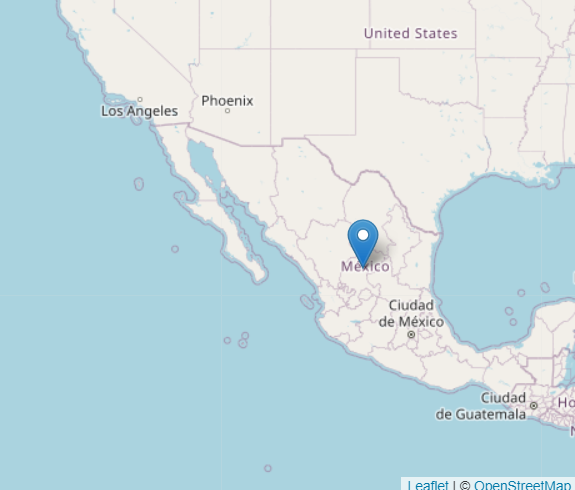

2. ALC_mg/L - Calidad del agua para alcalinidad
 - Media de 234.7 y mediana de 215.8 indican que el agua la calidad del agua es en general alta. Dado que la media es mayor que la mediana, aunque no por mucho, la distribución normal asimétrica hacia la derecha.
  - StdDev de 111 es bastante alta, lo que muestra que las aguas subterráneas manejan alta diferencia. Unas zonas  de muy baja calidad y otras de excelente calidad. Esto coincide con los min de 26.6 y máx de 1650.   
  - el 50% de los datos, entre Q1 y Q3, se encuentran con alcalinidad entre 164 y 293. coincide co las conlusiones preliminares de media y mediana de calidad alta.

3. CONDUCT_mS/cm - CALIDAD DEL AGUA PARA CONDUCTIVIDAD
 - Media de 1143 y mediana de 820 indican que la conductividad del agua es términos generales permisible para riego. Resalta la alta diferencia entre la media y la mediana, que evidencian una distribución normal altamente asimétrica hacia la derecha, señal de que en más puntos la conductividad es menor, lo cual es un buen indicador puesto que se disminuye el riesgo de riego.
  - StdDev de 1149 es bastante alta, lo que muestra que las medicines de conductividad son altamente variables a lo largo del país. Esto coincide con los min de 110 y máx de 18577 que es un outlier considerando los analísis realizados.  
  - el 50% de los datos, entre Q1 y Q3, se encuentran con alcalinidad entre 506 y 1328. Esto muestra que la conductividad se encuentra entre buena  y permisible.

4. FLUORUROS_mg/L - CALIDAD DEL AGUA PARA FLUORUROS
 - Media de 1.077 y mediana de 0.507 indican que la calidad del agua para fluoruros es en términos generales entre media y óptima. Resalta la alta diferencia entre la media y la mediana, que evidencian una distribución normal altamente asimétrica hacia la derecha, señal de que en más puntos la calidad del agua para fluoruros es media.
  - StdDev de 1.93 es bastante alta, lo que muestra que las mediciones de fluoruros  son altamente variables a lo largo del país. Esto coincide con los min de 0,19 y máx de 34.8 que es un outlier considerando los analísis realizados.  
  - el 50% de los datos, entre Q1 y Q3, se encuentran con alcalinidad entre 0.27 y 34.8. Esto confirma que la calidad de agua para fluoruros es bastante variable en méxico, desde baja hasta óptima.

5. DUR_mg/L - CALIDAD DEL AGUA PARA DUREZA
 - Media de 350 y mediana de 246 indican que el agua es en términos generales potable-dura con altos contenidos de minerales. Resalta la alta diferencia entre la media y la mediana, que evidencian una distribución normal asimétrica hacia la derecha, señal de que en más puntos la dureza tiene tendencia a ser moderadamente suave.
  - StdDev de 361 es bastante alta, lo que muestra que las mediciones de dureza  son altamente variables a lo largo del país. Esto coincide con los min de 19 y máx de 3810 que es un outlier considerando los analísis realizados.  
  - el 50% de los datos, entre Q1 y Q3, se encuentran con alcalinidad entre 0.122 y 456, rango de valores que se mantiene en los niveles de potable-dura.


6. COLI_FEC_NMP/100_mL - CALIDAD DEL AGUA PARA COLIFORMES FECALES
 - Media de 360 y mediana de 1 es un indicador interesante de que la mayoría de los puntos tienen una medición de 1 (excelente), pero hay varios puntos con mediciones muy altas, señal de alta contaminación, que mueven el promedio hasta 360. Lo anterior evidencia  una distribución normal altamente asimétrica hacia la derecha.
  - StdDev de 2065 es bastante alta y fortalece el punto de la alta variabilidad de los datos. Esto coincide con los min de 1 y máx de 24196 que es un outlier considerando los analísis realizados.  
  - el 50% de los datos, entre Q1 y Q3, se encuentran con alcalinidad entre 0.1 y 10.75. Esto confirma que la calidad de agua para fluoruros es en la mayoría de los puntos excelente o de buena calidad.

7. ANALISIS DE COMPONENTES QUÍMICOS

N_NO3_mg/L - Nitrógeno: potable excelente considerando mediana, q1 y q3

AS_TOT_mg/L - Arsenico: potable excelente considerando mediana, q1 y q3

CD_TOT_mg/L - Cadmio: potable excelente considerando mediana, q1 y q3

CR_TOT_mg/L - Cromo: potable excelente considerando mediana, q1 y q3

HG_TOT_mg/L - Mercurio: potable excelente considerando mediana, q1 y q3

PB_TOT_mg/L - Plomo: potable excelente considerando mediana, q1 y q3

MN_TOT_mg/L - Manganeso: potable excelente considerando mediana, q1 y q3

FE_TOT_mg/L - Hierro: potable excelente considerando mediana, q1 y q3

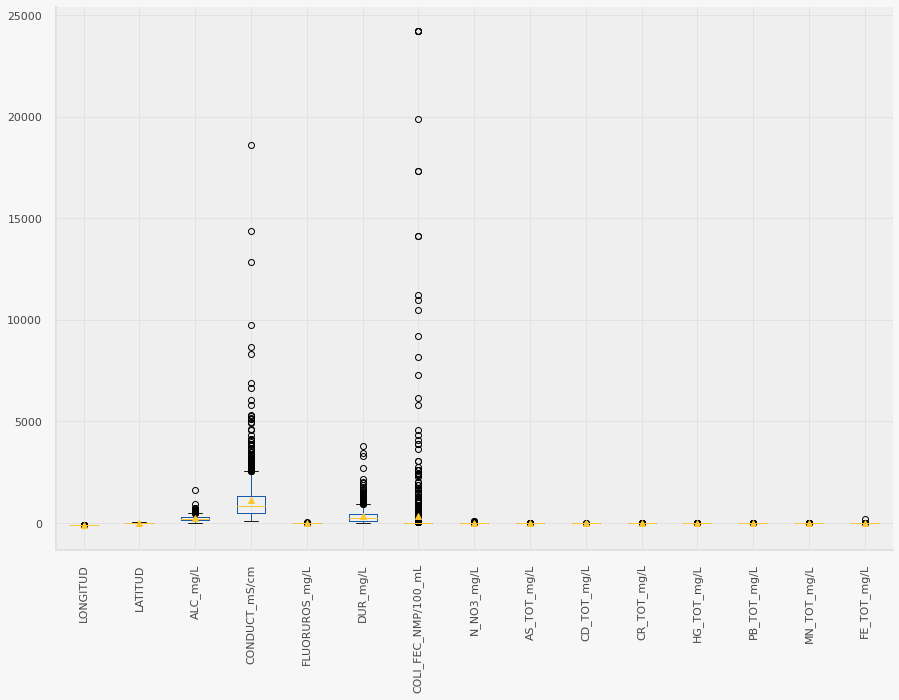

In [131]:
#Análisis de outliers
outliers = dfsub2.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

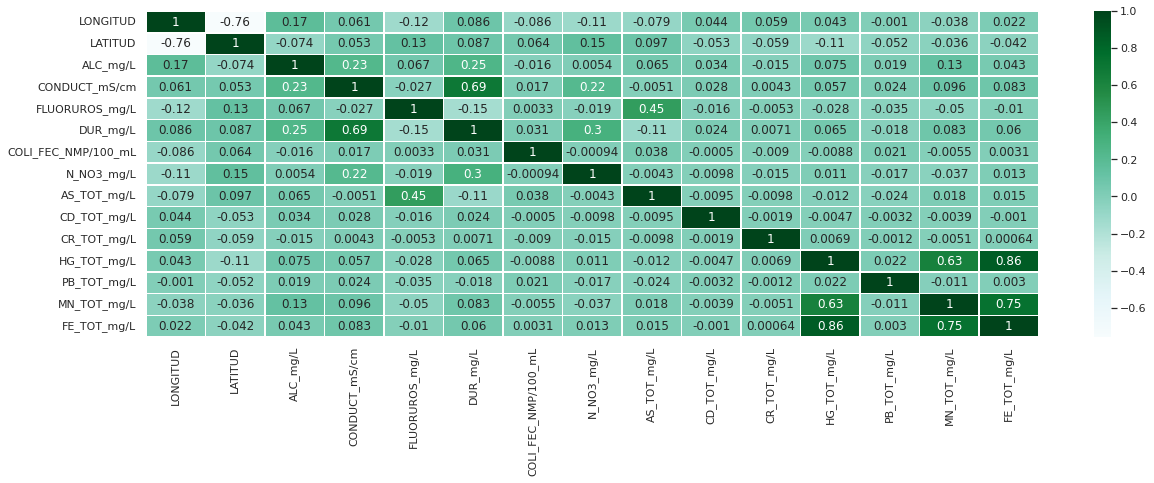

In [132]:
#Análisis de correlaciones
#Identificamos la correlación entre parejas de todas las columnas no categóricas del dataframe
sns.set(rc={'figure.figsize':(20,6)}) 

correlation = dfsub2.corr()
sns.heatmap(correlation, annot=True, cmap="BuGn", linewidths=0.5) 

plt.show()

El análisis de correlación muestra las siguientes correlaciones altas (por encima de 0.3):
 - COnductividad del agua y dureza (0.69). Esta alta correlación se explica en el hecho que la dureza muestra la cantidad de minerales del agua, los cuales contribuyen con la conductividad.
 - FLuoruros y arsénico (0.45): a mayor arsénico, mayor contenidos de cluoruros en el agua.
  - Dureza y nitrógeno (0.3): relación que se explica en el hecho que el nitrógeno es un mineral y a dureza es el grado de minerales del agua.
  - Mercurio con Manganeso y HIerro (0.63 y 0.86): interesante que el agua contenga prácticamente los tres químicos en conjunto. Corresponderá a deshechos industriales?

### 3. ANÁLISIS DE RELACIÓN ENTRE CALIDAD DE AGUA Y UBICACIÓN CON K-MEANS

In [133]:
# Filtramos los lugares relacionados a la ubicación

dfsub3 = dfsub2[['LATITUD','LONGITUD']]

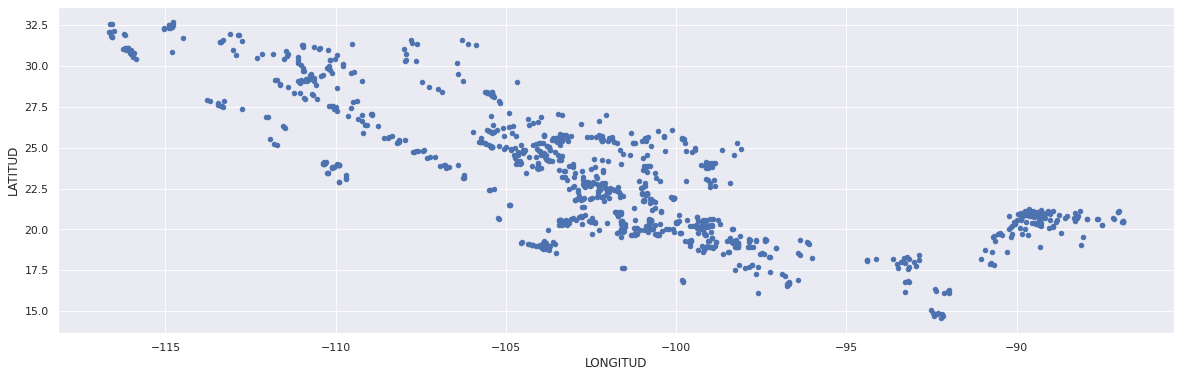

In [134]:
# Visualizamos estoy lugares en un mapa

dfsub3.plot.scatter('LONGITUD','LATITUD')

In [135]:
# Revisamos los datos
dfsub3.describe()

,LATITUD,LONGITUD
count,1054.000000,1054.000000
mean,23.161796,-101.848270
std,3.875005,6.697568
min,14.561150,-116.664250
25%,20.224857,-105.385170
50%,22.640705,-102.170665
75%,25.508770,-98.971268
max,32.677713,-86.864120


In [136]:
# Comenzamos el proceso para graficar los datos geográficos
dfsub3["COORDENADAS"] = list(zip(dfsub3.LONGITUD, dfsub3.LATITUD))
dfsub3["COORDENADAS"] = dfsub3["COORDENADAS"].apply(Point)

gdf = gpd.GeoDataFrame(dfsub3, geometry="COORDENADAS")
gdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LATITUD,LONGITUD,COORDENADAS
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)


In [137]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [138]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

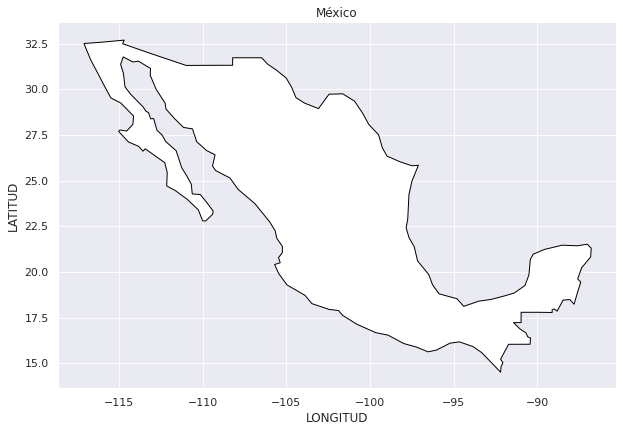

In [139]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

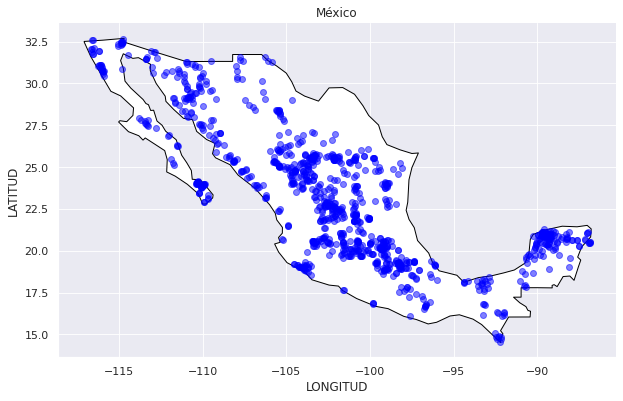

In [140]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

### 4. AGRUPAMIENTO DE LATITUDES Y LONGITUDES CON K-MEANS

In [141]:
K = dfsub3[["LATITUD","LONGITUD"]]
K

,LATITUD,LONGITUD
0,22.20887,-102.02210
1,21.99958,-102.20075
2,22.36685,-102.28801
3,22.18435,-102.29449
4,23.45138,-110.24480
...,...,...
1063,24.76036,-99.54191
1064,24.78280,-99.70099
1065,25.55197,-99.82249
1066,24.80118,-100.32683


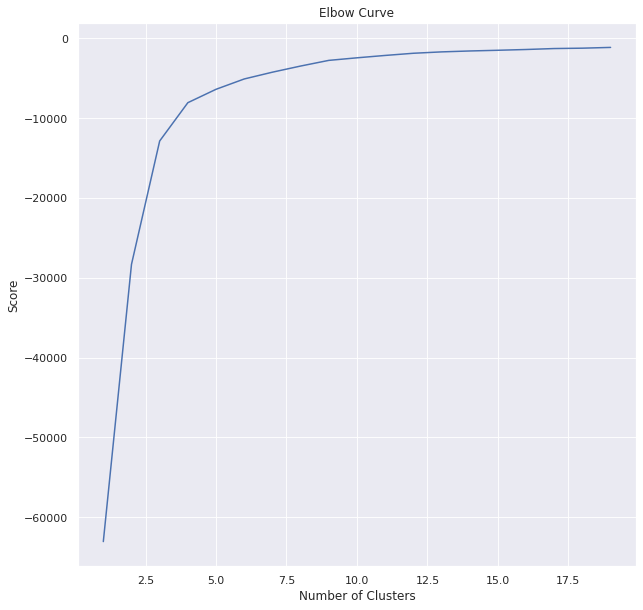

In [142]:
#from sklearn.cluster import KMeans
K = dfsub3[["LATITUD","LONGITUD"]]

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(K).score(K) for i in range(len(kmeans))]
score
plt.subplots(figsize=(10,10))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [143]:
kmeans = KMeans(n_clusters=3).fit(K)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(K)

C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["COORDENADAS"] = list(zip(C_DF[0], C_DF[1]))
C_DF["COORDENADAS"] = C_DF["COORDENADAS"].apply(Point)


gdf_C = gpd.GeoDataFrame(C_DF, geometry="COORDENADAS")
gdf_C

,0,1,COORDENADAS
0,28.420375,-110.740896,POINT (28.420 -110.741)
1,22.271624,-101.715581,POINT (22.272 -101.716)
2,19.475165,-90.698434,POINT (19.475 -90.698)


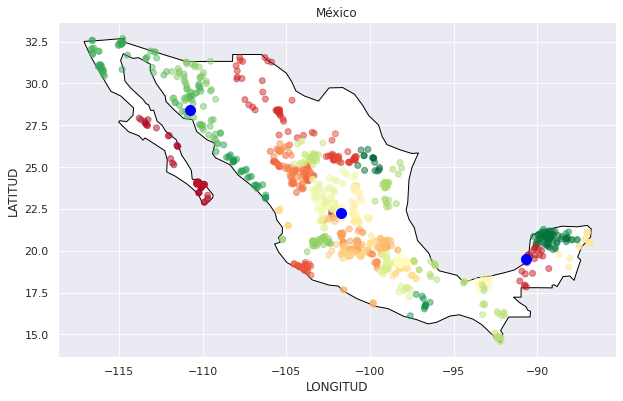

In [146]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, alpha = 0.5, cmap='RdYlGn')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='blue', s=100)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()